Importing & Inspecting Data


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
data = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding='latin-1',header=None)

data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']


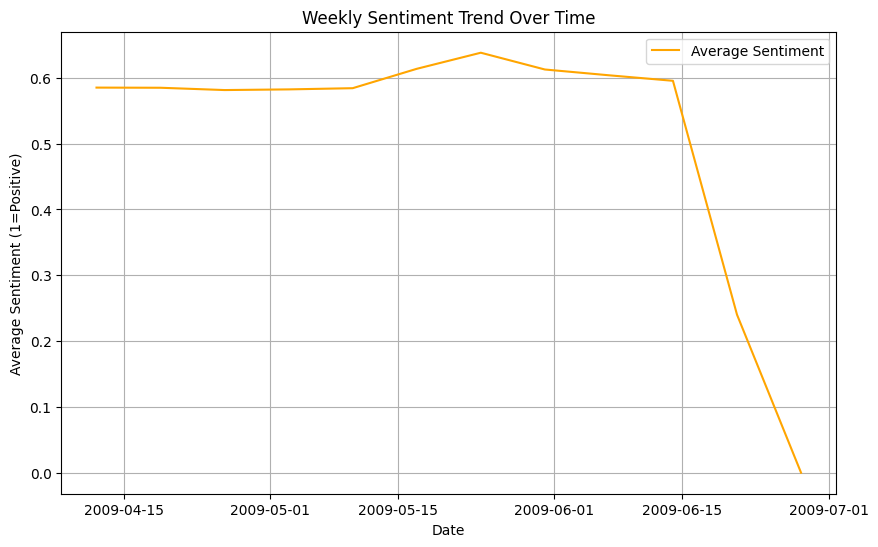

In [29]:
data['date'] = pd.to_datetime(data['date'].astype(str).str.replace(r' [A-Z]{3}', '', regex=True))

data['sentiment'] = data['target'].replace({4: 1})

data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

data['sentiment_num'] = data['sentiment']

weekly_sentiment = data['sentiment_num'].resample('W').mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(weekly_sentiment.index, weekly_sentiment.values, color='orange', label='Average Sentiment')
plt.title('Weekly Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sentiment (1=Positive)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:

data.reset_index(inplace=True)


data.drop(columns=['date'], inplace=True)


In [31]:

data = data[['text', 'target']]
print(data.columns)
data.head()

Index(['text', 'target'], dtype='object')


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [32]:
data['target'] = data['target'].apply(lambda x: 1 if x == 4 else 0)

data.head()

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


Exploring Data

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   text    1600000 non-null  object
 1   target  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [34]:
data.describe()

,target
count,1600000.0
mean,0.5
std,0.5
min,0.0
25%,0.0
50%,0.5
75%,1.0
max,1.0


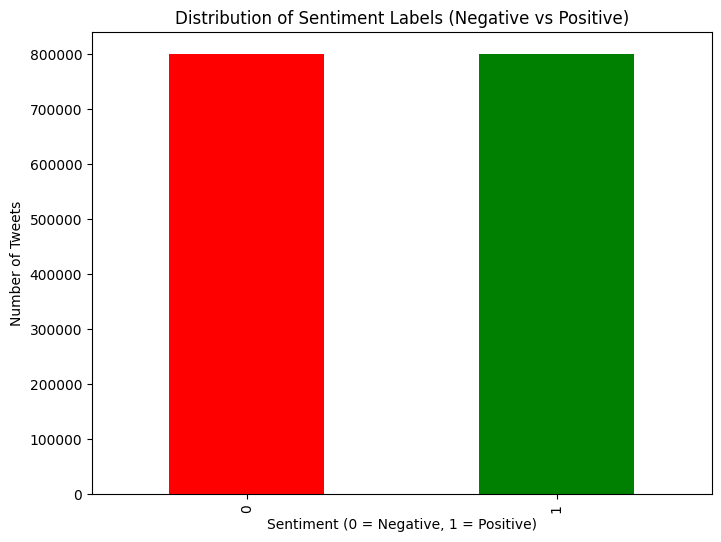

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
data['target'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Distribution of Sentiment Labels (Negative vs Positive)")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Number of Tweets")
plt.show()


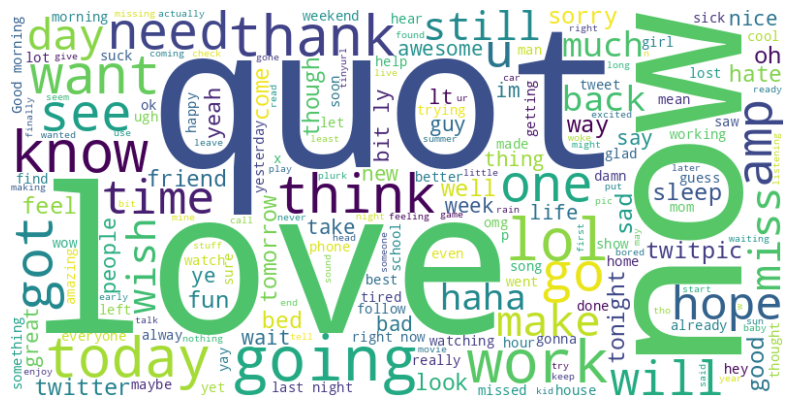

In [36]:
from wordcloud import WordCloud

all_words = " ".join(data['text'])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_words)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


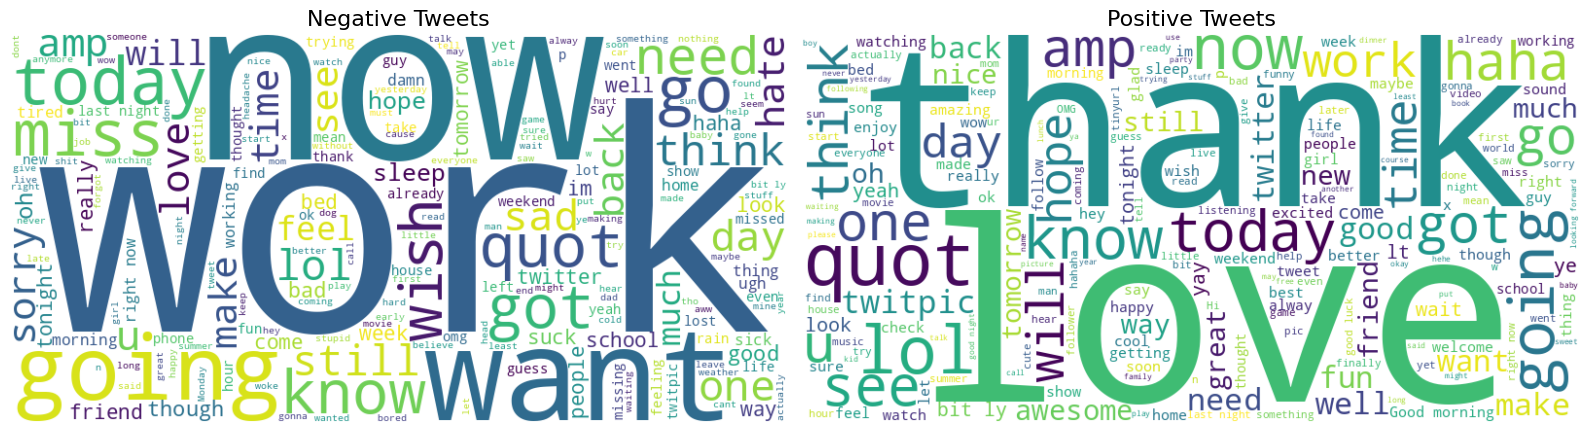

In [37]:


negative_text = " ".join(data[data['target'] == 0]['text'])

positive_text = " ".join(data[data['target'] == 1]['text'])

plt.figure(figsize=(16, 8))


plt.subplot(1, 2, 1)
wordcloud_neg = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title("Negative Tweets", fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title("Positive Tweets", fontsize=16)
plt.axis('off')

plt.tight_layout()
plt.show()


In [38]:
print("Negative Tweets:")
print(data[data['target'] == 0].head())

print("Positive Tweets:")
print(data[data['target'] == 1].head())


Negative Tweets:
                                                text  target
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...       0
1  is upset that he can't update his Facebook by ...       0
2  @Kenichan I dived many times for the ball. Man...       0
3    my whole body feels itchy and like its on fire        0
4  @nationwideclass no, it's not behaving at all....       0
Positive Tweets:
                                                     text  target
800000       I LOVE @Health4UandPets u guys r the best!!        1
800001  im meeting up with one of my besties tonight! ...       1
800002  @DaRealSunisaKim Thanks for the Twitter add, S...       1
800003  Being sick can be really cheap when it hurts t...       1
800004    @LovesBrooklyn2 he has that effect on everyone        1


Pre_processing Data

In [39]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [41]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'@\w+|#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(clean_text)

data[['text', 'clean_text']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,clean_text
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",thats bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by ...,upset cant update facebook texting might cry r...
2,@Kenichan I dived many times for the ball. Man...,dived many time ball managed save rest go bound
3,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,"@nationwideclass no, it's not behaving at all....",behaving im mad cant see


In [42]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)

X = vectorizer.fit_transform(data['clean_text'])

y = data['target']

print(X.shape)

(1600000, 3000)


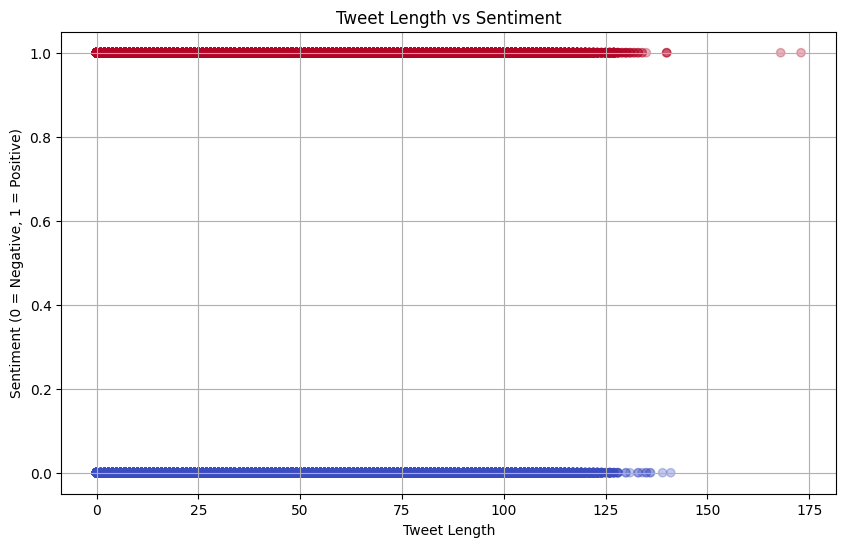

In [43]:
import matplotlib.pyplot as plt

# Assuming 'data' contains 'clean_text' and 'target'
data['tweet_length'] = data['clean_text'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(data['tweet_length'], data['target'], alpha=0.3, c=data['target'], cmap='coolwarm')
plt.title('Tweet Length vs Sentiment')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment (0 = Negative, 1 = Positive)')
plt.grid(True)
plt.show()


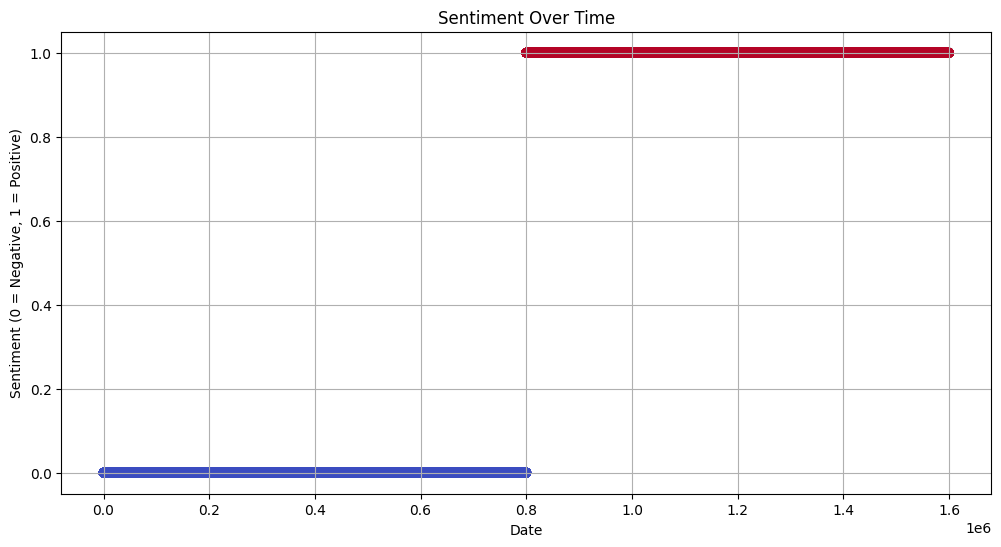

In [44]:
data['sentiment'] = data['target'].replace({0: 0, 1: 1})

plt.figure(figsize=(12, 6))
plt.scatter(data.index, data['sentiment'], alpha=0.3, c=data['sentiment'], cmap='coolwarm')
plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment (0 = Negative, 1 = Positive)')
plt.grid(True)
plt.show()


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model Training & Building (Naive Bayes)

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

model = MultinomialNB()

model.fit(X_train, y_train)


MultinomialNB()

Model Prediction

In [47]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [48]:
y_test

,target
541200,0
750,0
766711,0
285055,0
705995,0
...,...
839535,1
1023175,1
1349377,1
1086942,1


In [49]:
y_test.values

array([0, 0, 0, ..., 1, 1, 0])

Model Evaluation

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.75565625

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.74      0.75    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

Confusion Matrix:
[[122425  37069]
 [ 41121 119385]]


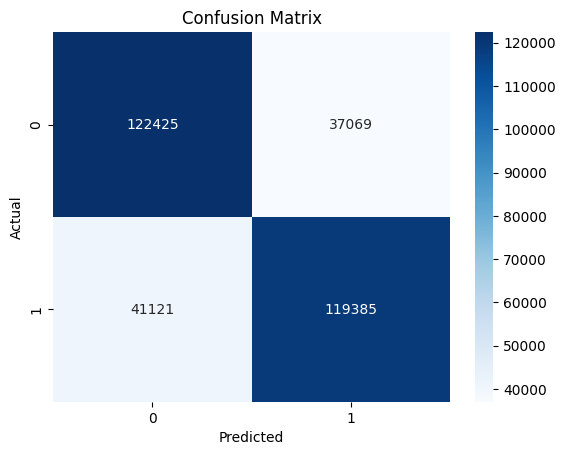

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Model Training & Building (Logistic Regression)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.76825625
              precision    recall  f1-score   support

           0       0.79      0.73      0.76    159494
           1       0.75      0.80      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



Model Training & Building (Support Vector Machine)

In [53]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.76754375
              precision    recall  f1-score   support

           0       0.79      0.72      0.76    159494
           1       0.75      0.81      0.78    160506

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000

